Group Members : CHEREL Bastien - MAALOUL Ahmed

## TUTORIAL 4: EXPLAINABILITY AI

### Question 2.

Select a dataset on Kaggle that seems interesting for the group. The dataset must contain explanatory variables that can be interpreted.

https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd 

data = pd.read_csv("housing-2.csv")

In [2]:
# Convert the median income from thousands $ to $ 
data["median_income"] *= 10000 
# Remove the outliers (e.g. herer 500,000 was a ceiling value)
data = data[data["median_house_value"] < 500000]
data = data[data["housing_median_age"] < 50]
# Remove the people that lives on an island not relevant <1%
data = data[data["ocean_proximity"]!="ISLAND"]

In [3]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
8     -122.26     37.84                42.0       2555.0           665.0   
20    -122.27     37.85                40.0        751.0           184.0   
21    -122.27     37.85                42.0       1639.0           367.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0        83252.0            452600.0        NEAR BAY  
1       2401.0      1138.0        83014.0            358500.0        NEAR BAY  
8       1206.0       595.0        20804.0            226700.0        NEAR BAY  
20       409.0       166.0        13578.0            147500.0        NEAR BAY  
21       929.0       366.0        17135.0            159800.0        NEAR BAY

### Question 3.
Let’s begin with some visualisations.
* Based on your intuition what are the most important variables for predicting your target variable?

To predict the median house value the most important variables may be : 
- the median income
- the ocean proximity
- the total rooms



* Create visualisations that take into account the type of variable (categorical, numerical) that show
the correlation of the features you selected.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

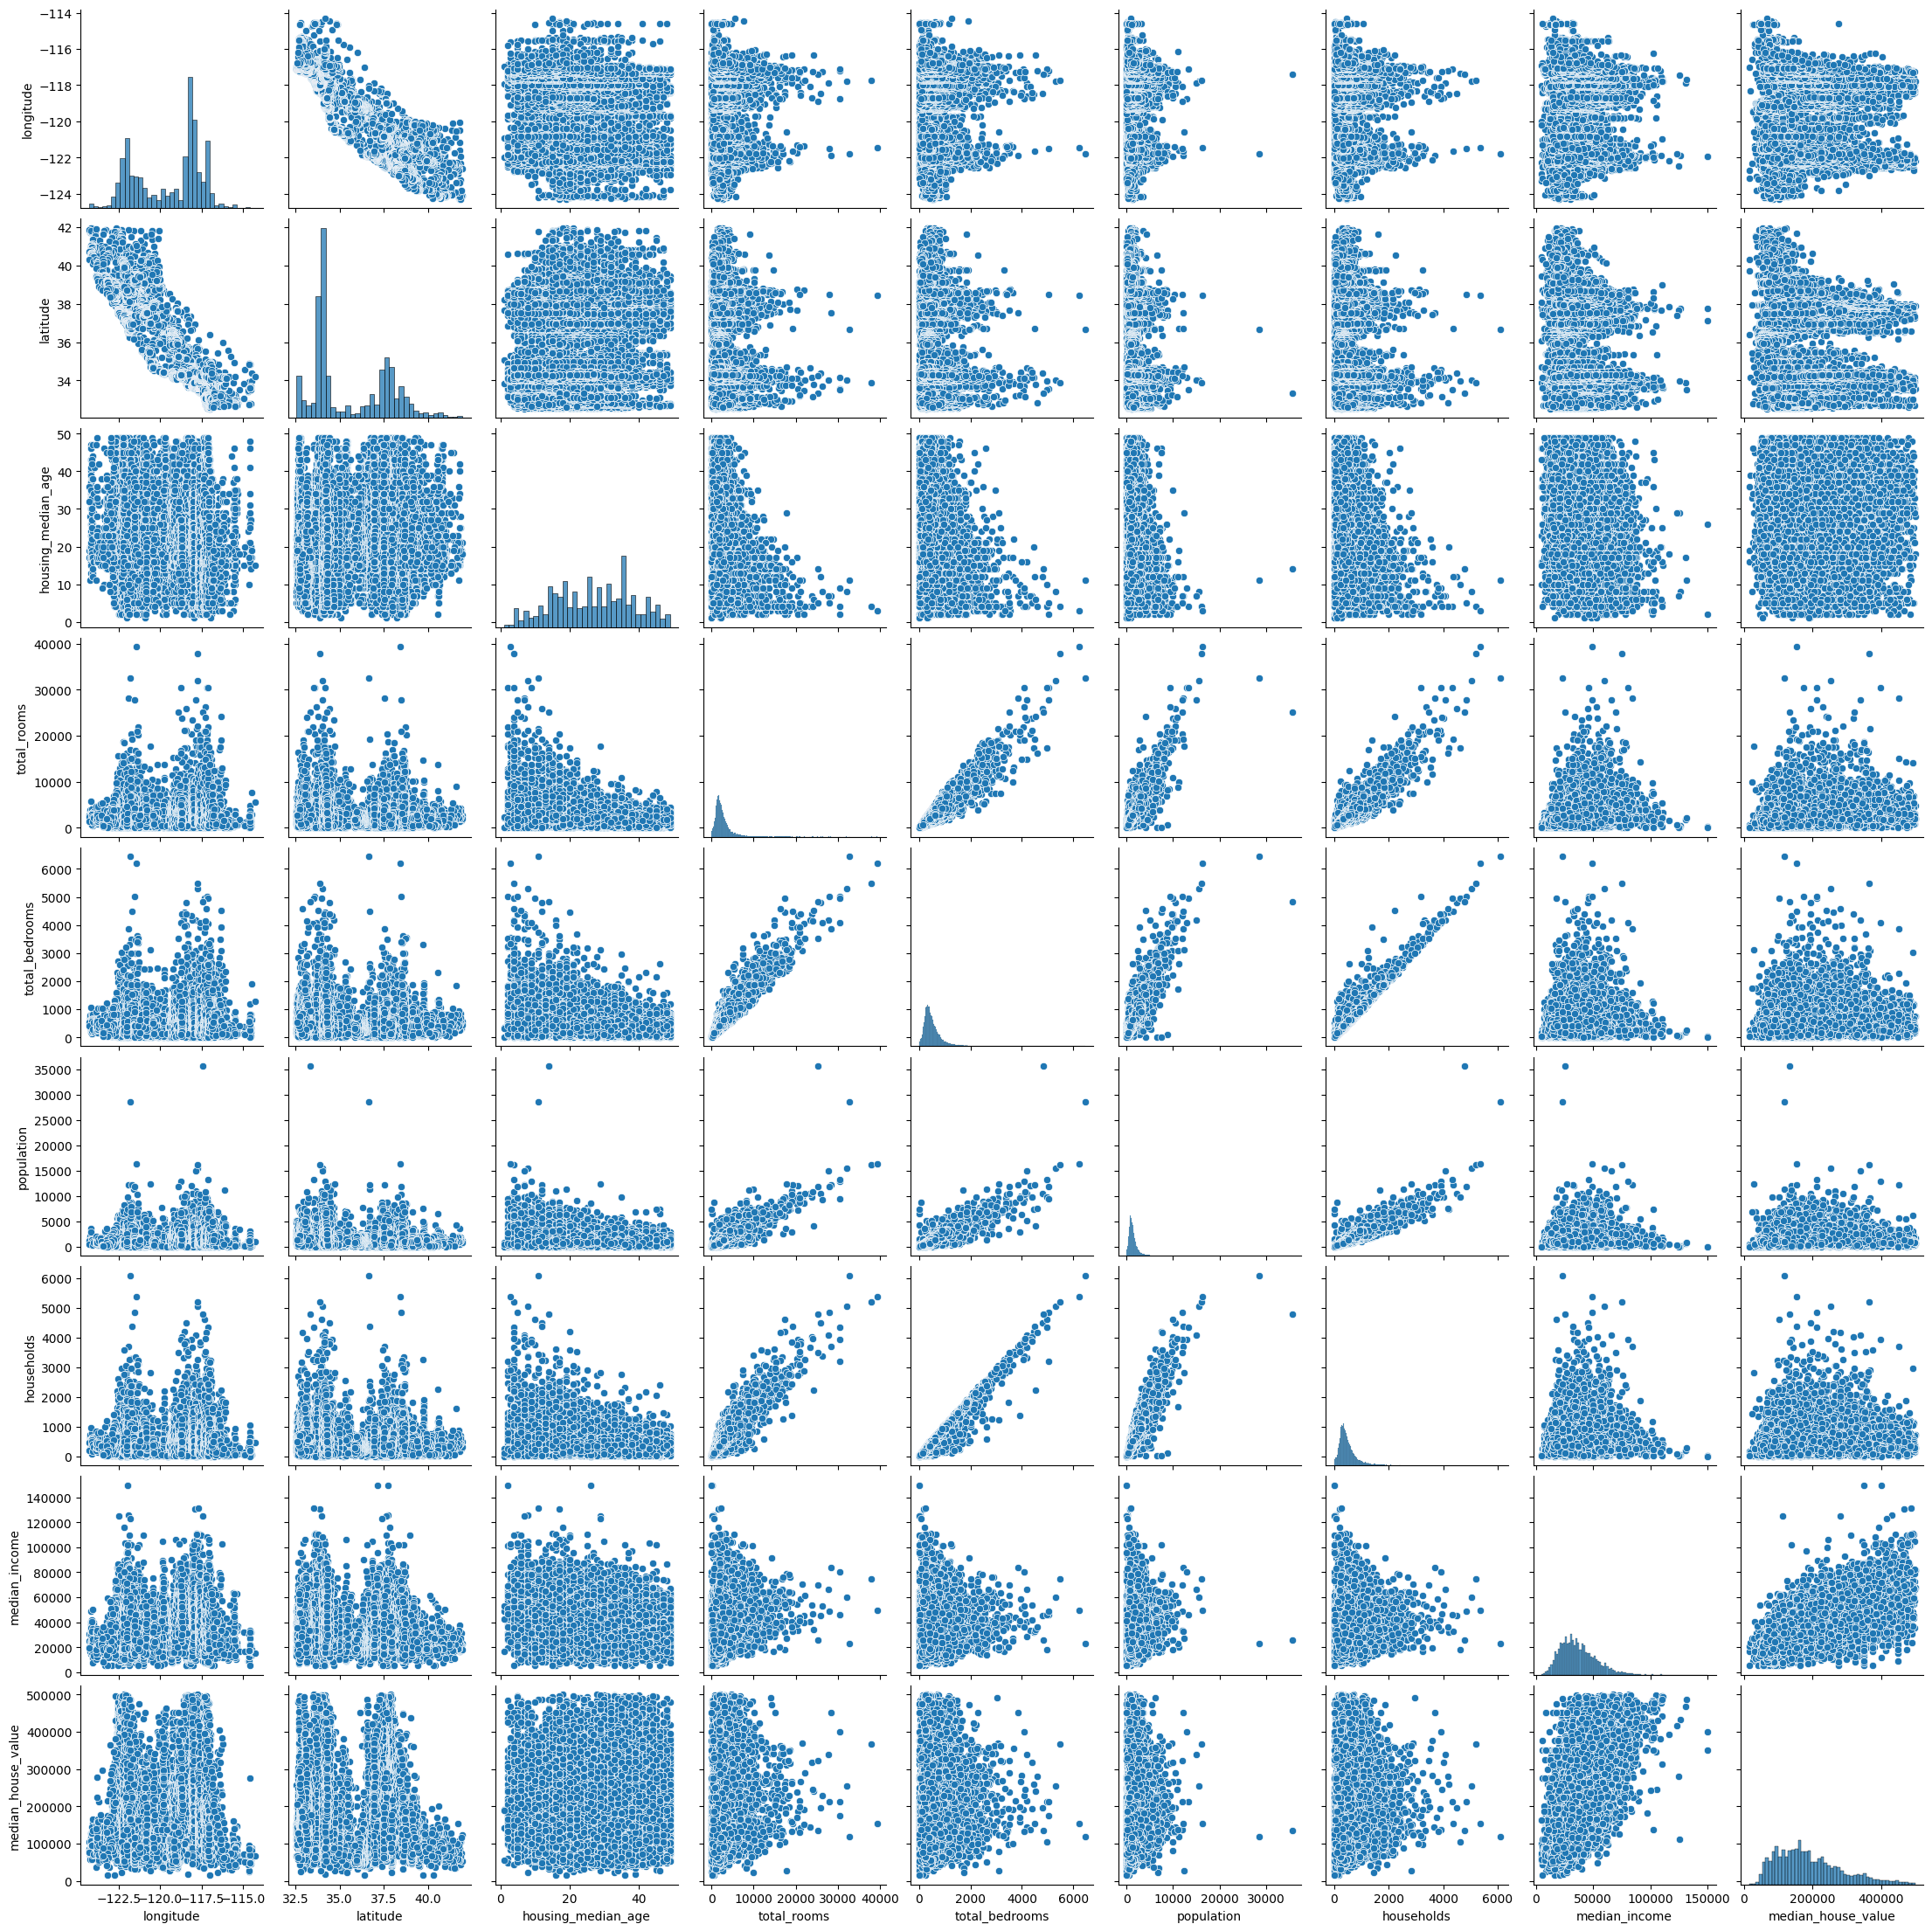

In [5]:
sns.pairplot(data)

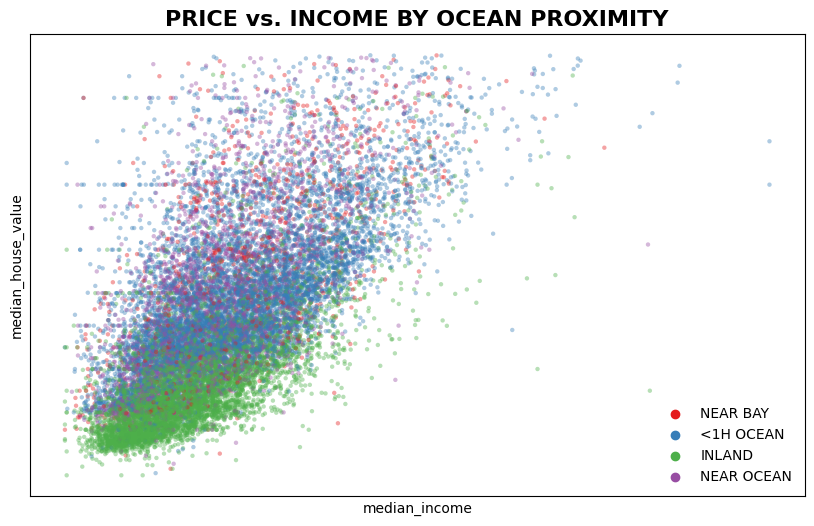

In [6]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data, x="median_income", y="median_house_value", palette = "Set1",hue="ocean_proximity", marker="o",s=10,linewidth=0, alpha = 0.4)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title("PRICE vs. INCOME BY OCEAN PROXIMITY",fontsize=16, fontweight='bold')
legend = plt.legend(loc='upper right', title="Obesity", title_fontsize=12)


legend.remove()  # Remove the default legend
plt.legend(title_fontsize=12, loc='lower right', frameon = False)
plt.tick_params(left=False, right=False, labelleft=False)

plt.show()

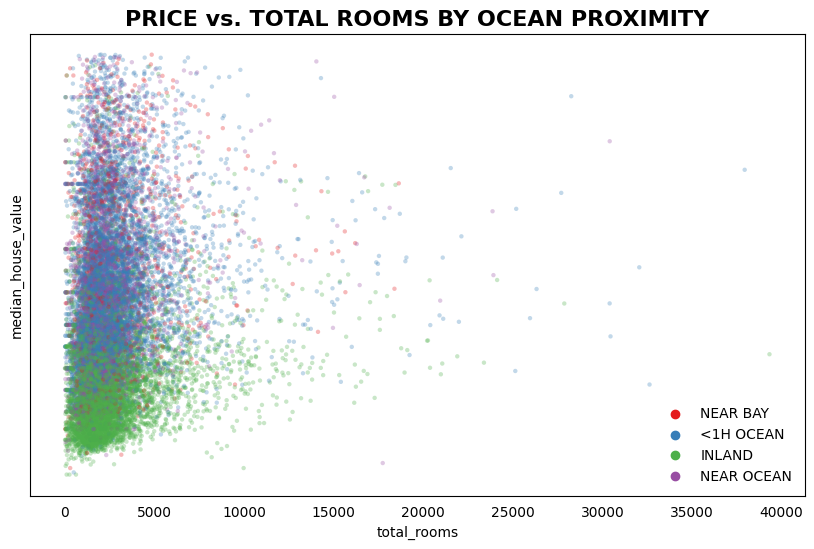

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data, x="total_rooms", y="median_house_value", palette = "Set1",hue="ocean_proximity", marker="o",s=10,linewidth=0, alpha = 0.3)

plt.tick_params(left = False, right = False , labelleft = False , bottom = False) 
plt.title("PRICE vs. TOTAL ROOMS BY OCEAN PROXIMITY",fontsize=16, fontweight='bold')
legend = plt.legend(loc='upper right', title="Obesity", title_fontsize=12)


legend.remove()  # Remove the default legend
plt.legend(title_fontsize=12, loc='lower right', frameon = False)
plt.show()

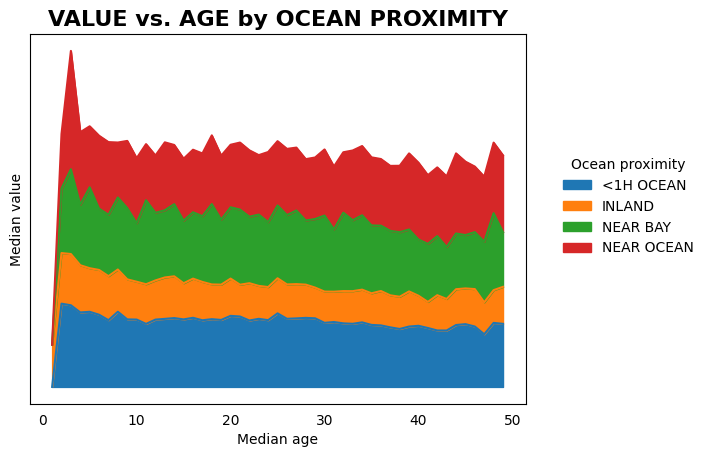

In [8]:
import numpy as np

df_counts = data.groupby(['housing_median_age','ocean_proximity'])['median_house_value'].mean().unstack()
df_counts.plot(kind='area', stacked=True)
plt.title("VALUE vs. AGE by OCEAN PROXIMITY", fontsize=16, fontweight='bold')
plt.xlabel("Median age")
plt.ylabel("Median value")
plt.tick_params(left=False, bottom=False, labelleft=False)
plt.xticks(rotation=0)
plt.legend(title="Ocean proximity", bbox_to_anchor=(1.05, 0.7), frameon=False)
# fig, ax = plt.subplots()

# ax.stackplot(np.vstack(df_counts))

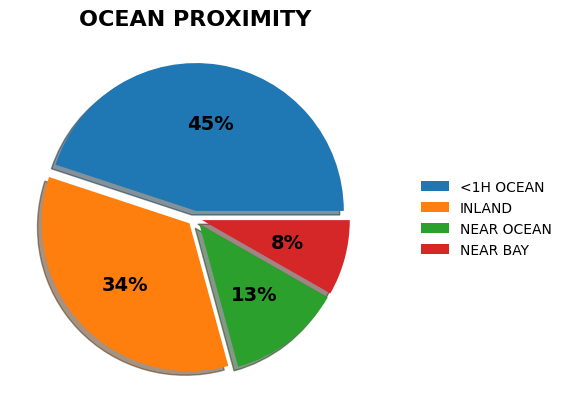

In [9]:
plt.style.use("default")
array = data["ocean_proximity"].value_counts()
ax = array.plot(kind = "pie",  startangle = 0,
                shadow = True,legend=True, ylabel="",textprops={'weight': 'bold', 'size': 14},
                autopct = '%1.0f%%',pctdistance=.6, labeldistance=None, explode = [0.05 for _ in range(len(array))])

ax.legend(bbox_to_anchor=(1.5, 0.5), loc='right',frameon = False)

plt.title("OCEAN PROXIMITY",fontsize=16, fontweight='bold')
plt.show()

/Users/bastien/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


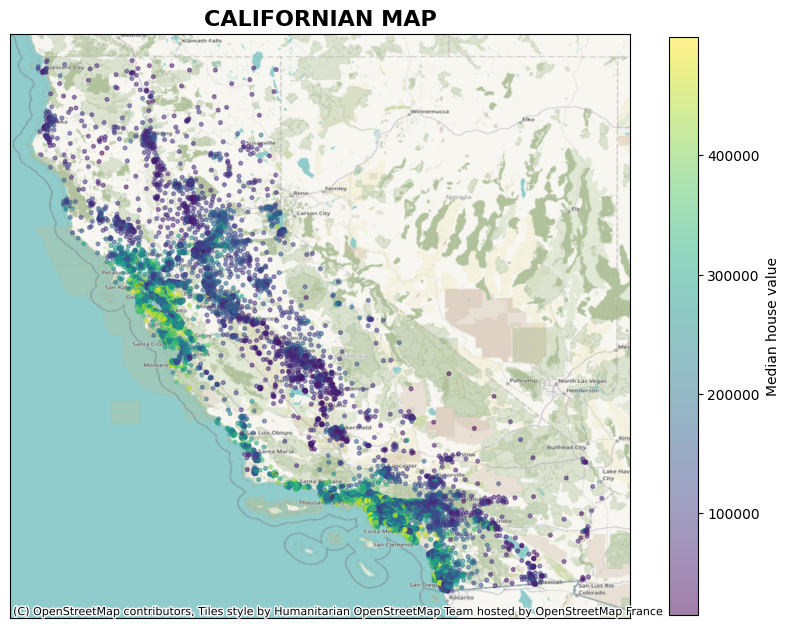

In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

# Create GeoDataFrame with 'latitude' and 'longitude' columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Plot the GeoDataFrame with a basemap
fig, ax = plt.subplots(figsize=(10, 10))

gdf.crs = "EPSG:4326"
# Plot the GeoDataFrame
plot = gdf.plot(ax=ax, column='median_house_value', cmap='viridis', alpha=0.5, markersize=7, legend=False)

ctx.add_basemap(ax, crs = gdf.crs.to_string())

cbar = plt.colorbar(plot.collections[0], ax=ax, orientation='vertical', shrink=0.75)
cbar.set_label('Median house value')
# Show the plot
plt.title('CALIFORNIAN MAP',fontsize=16, fontweight='bold')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.show()

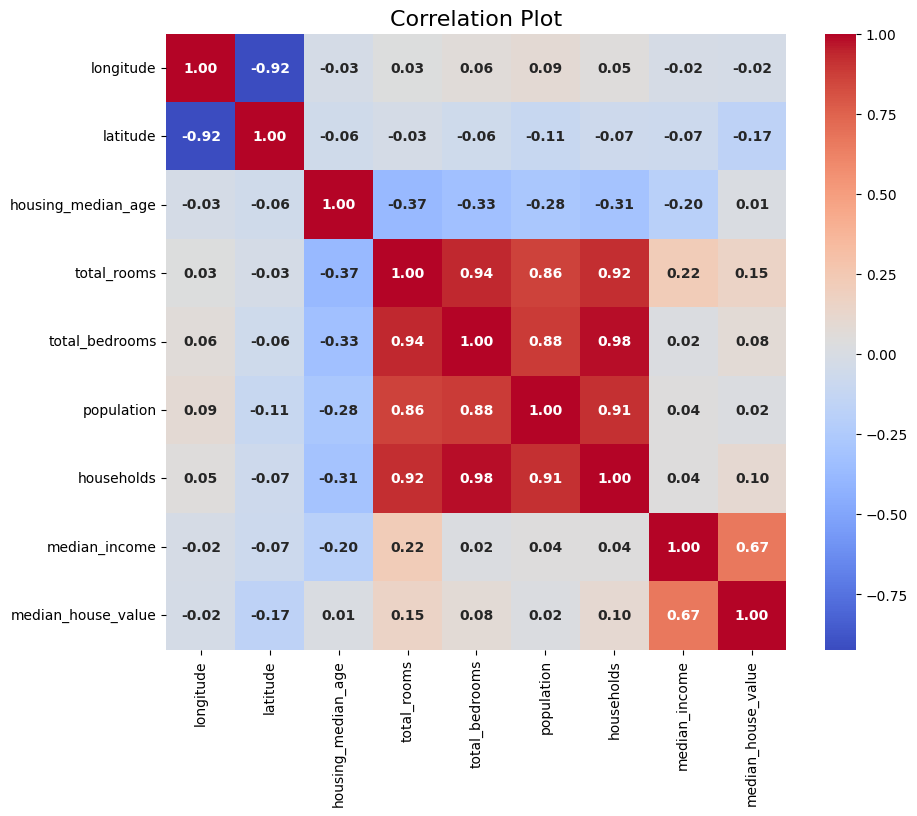

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10, "fontweight" :"bold"})
plt.title('Correlation Plot', fontsize=16)
plt.show()

* Don’t forget to clean your dataset as needed in order to deal with missing values and outliers

In [12]:
# Drop the points when a value is missing
data = data.dropna()

# Drop useless columns
data = data.drop(columns=["latitude","longitude", "total_bedrooms",	"population", "total_rooms"])


### Question 4.
Let’s do a linear regression.
* Do the variable transformations that are needed (on hot encoding, log etc...)


In [13]:
data = pd.get_dummies(data, columns = ["ocean_proximity"], drop_first=True)
data

housing_median_age  households  median_income  median_house_value  \
0                    41.0       126.0        83252.0            452600.0   
1                    21.0      1138.0        83014.0            358500.0   
8                    42.0       595.0        20804.0            226700.0   
20                   40.0       166.0        13578.0            147500.0   
21                   42.0       366.0        17135.0            159800.0   
...                   ...         ...            ...                 ...   
20635                25.0       330.0        15603.0             78100.0   
20636                18.0       114.0        25568.0             77100.0   
20637                17.0       433.0        17000.0             92300.0   
20638                18.0       349.0        18672.0             84700.0   
20639                16.0       530.0        23886.0             89400.0   

       ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
0                           0                         1   
1                           0                         1   
8                           0                         1   
20                          0                         1   
21                          0                         1   
...                       ...                       ...   
20635                       1                         0   
20636                       1                         0   
20637                       1                         0   
20638                       1                         0   
20639                       1                         0   

       ocean_proximity_NEAR OCEAN  
0                               0  
1                               0  
8                               0  
20                              0  
21                              0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[18195 rows x 7 columns]

* Fit the linear regression


In [14]:
# Select features and target variable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

target = "median_house_value"

# Extract features and target variable
X = data.drop(target, axis=1)
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 3714188392.069578
Root Mean Squared Error: 60944.14157299763
R-squared: 0.58649424104833


* Interpret the coeﬀicients of your regression


In [15]:

# Access coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_
feature_names = X.columns.to_list()
# Print the coefficients and intercept
print("Features :", feature_names)
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Features : ['housing_median_age', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
Coefficients: [ 7.13086026e+02  1.96059867e+01  3.64631571e+00 -6.57973200e+04
 -2.34781706e+03  1.62187349e+04]
Intercept: 46116.595745693194


* Does any coeﬀicient contradict your intuition?

I did not think that the median age would be that significant, however the nearest the house is to the ocean the higher is the price.

### Question 5.
Let’s build a more complex model
* Build the ”best” model you can using traditional data science (no deep learning)
* Don’t hesitate to fine tune it, try different combination of variables etc



In [16]:
from sklearn.model_selection import GridSearchCV
import xgboost
# Assuming you have your dataset loaded and preprocessed, and the features are in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for XGBoost regression
params = {
    'objective': 'reg:squarederror',  # For regression
    'eval_metric': 'rmse',            # Evaluation metric (Root Mean Squared Error)
    'eta': 0.1,                       # Learning rate
    'max_depth': 6,                   # Maximum depth of the tree
    'min_child_weight': 1,            # Minimum sum of instance weight needed in a child
    'subsample': 0.8,                 # Subsample ratio of the training instance
    'colsample_bytree': 0.8,          # Subsample ratio of columns when constructing each tree
    'gamma': 0,                       # Minimum loss reduction required to make a further partition on a leaf node
    'seed': 666                       # Random seed for reproducibility
}

# Initialize XGBoost regressor
xgb_model = xgboost.XGBRegressor(**params)

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [10, 12],
    'min_child_weight': [5, 10],
    'gamma': [0, 0.1],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit the XGBoost model with the best parameters
best_xgb_model = xgboost.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = best_xgb_model.predict(X_test)



* What is the best metric you can reach? Can you consider it ”good”


In [17]:
# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_xgb:.3f}")
print(f"Root Mean Squared Error: {rmse_xgb:.3f}")
print(f"R-squared: {r2_xgb:.3f}")

Mean Squared Error: 4089279975.960
Root Mean Squared Error: 63947.478
R-squared: 0.545


* Given your results what use case can be done with this model?


Question 6.
Using shapley values explain your model
* Start by giving some forceplot examples


Sample: 0


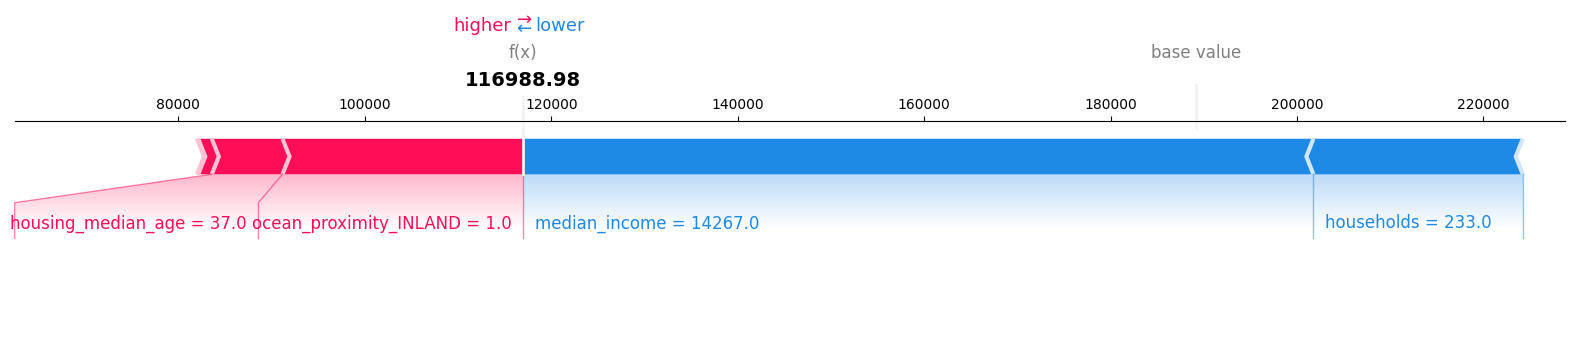

Sample: 1


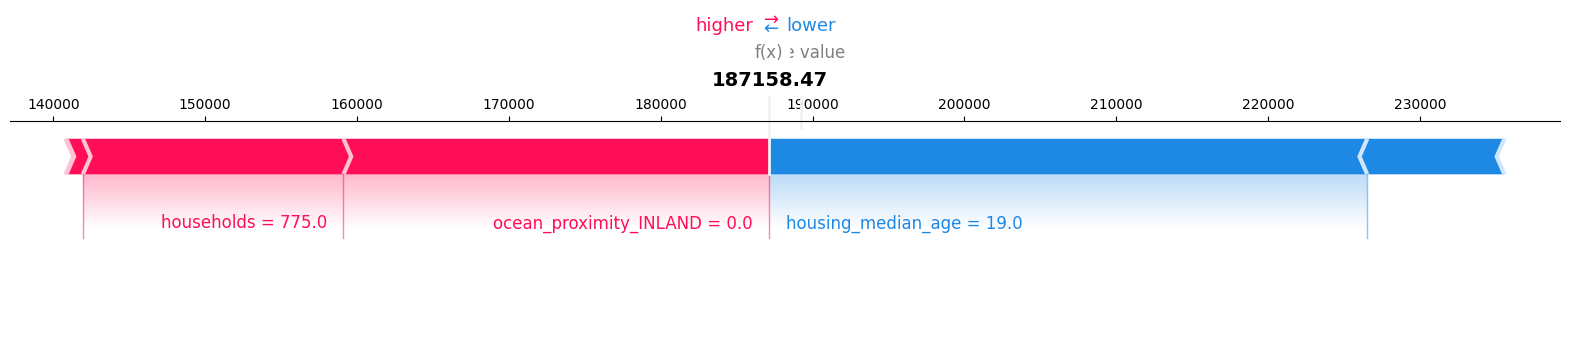

Sample: 2


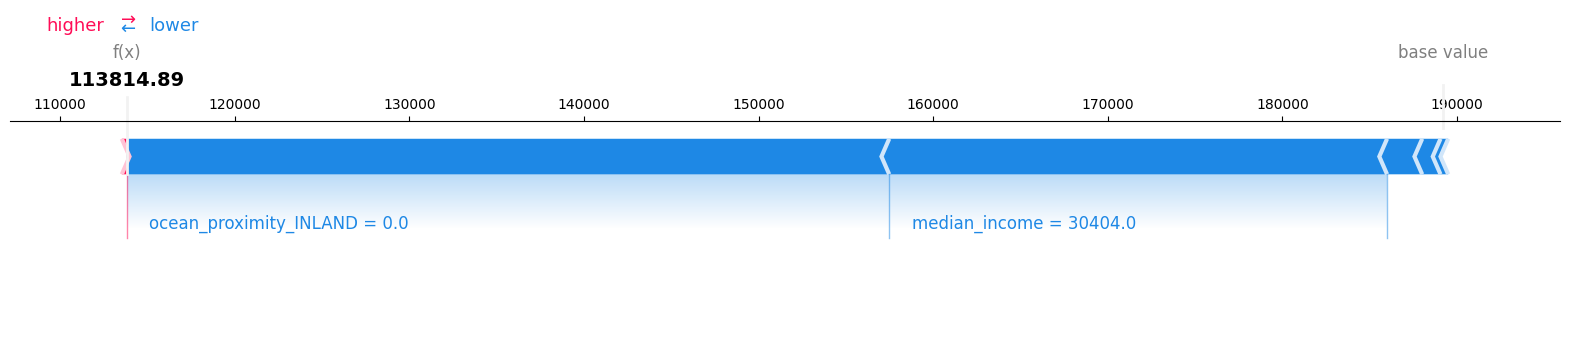

In [18]:
import shap 
sample_indices = [0, 1, 2]  # Select a few samples for visualization
xgb_explainer = shap.TreeExplainer(best_xgb_model)

xgb_shap_values = xgb_explainer.shap_values(X_train)

for i, idx in enumerate(sample_indices):
    print("Sample:", idx)
    shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[idx], features=X_test.iloc[idx], feature_names=X_train.columns,matplotlib=True, show=True)
    plt.show()

* Use the feature importance and identify the most important variables


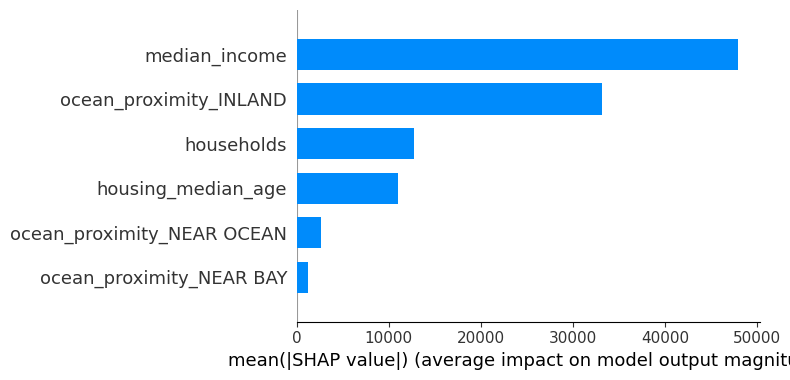

In [19]:
# Create a summary plot with bar plot type
shap.summary_plot(xgb_shap_values, X_test, plot_type="bar", feature_names=X_train.columns)

# Show the plot
plt.show()

* Compare them to the variables identified in the linear regression


Sample: 0


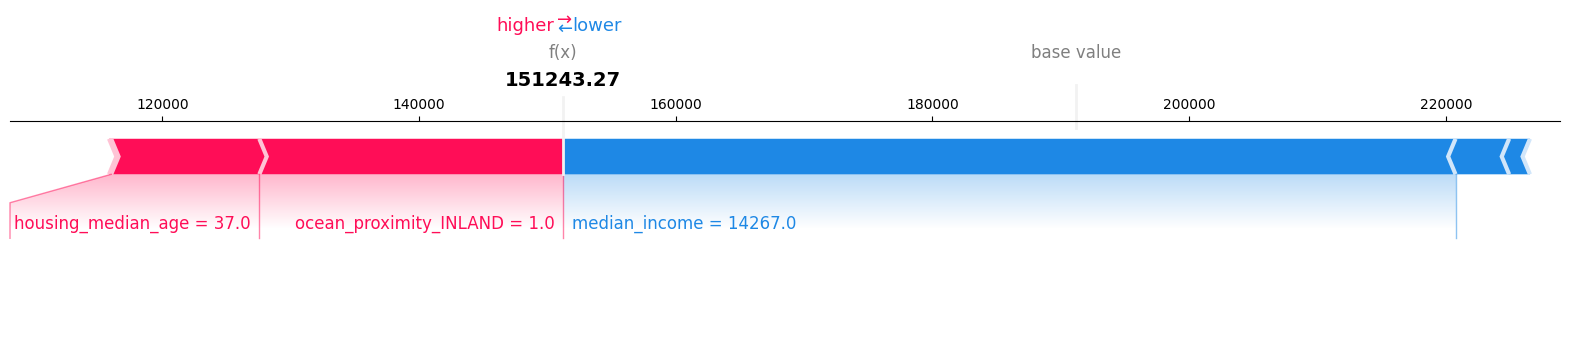

Sample: 1


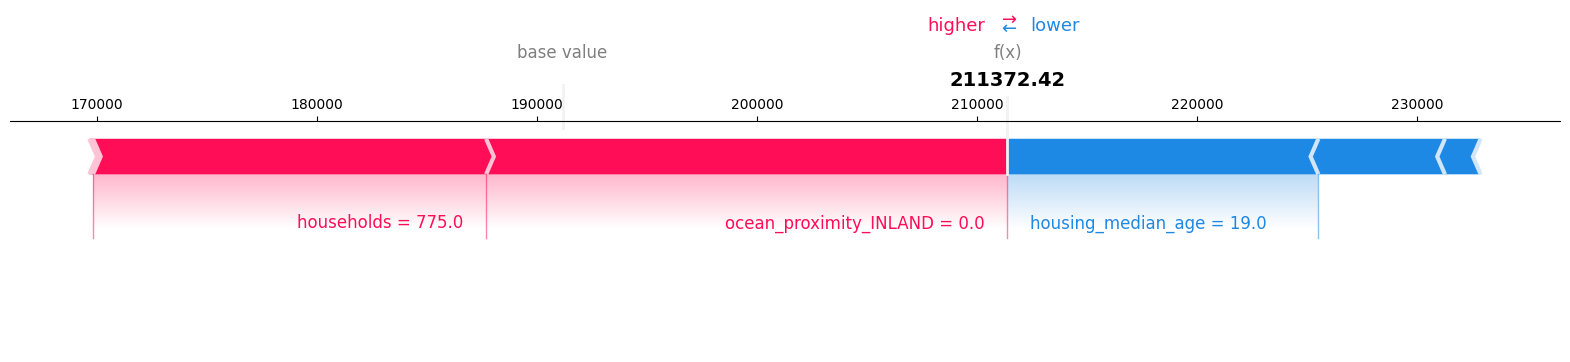

Sample: 2


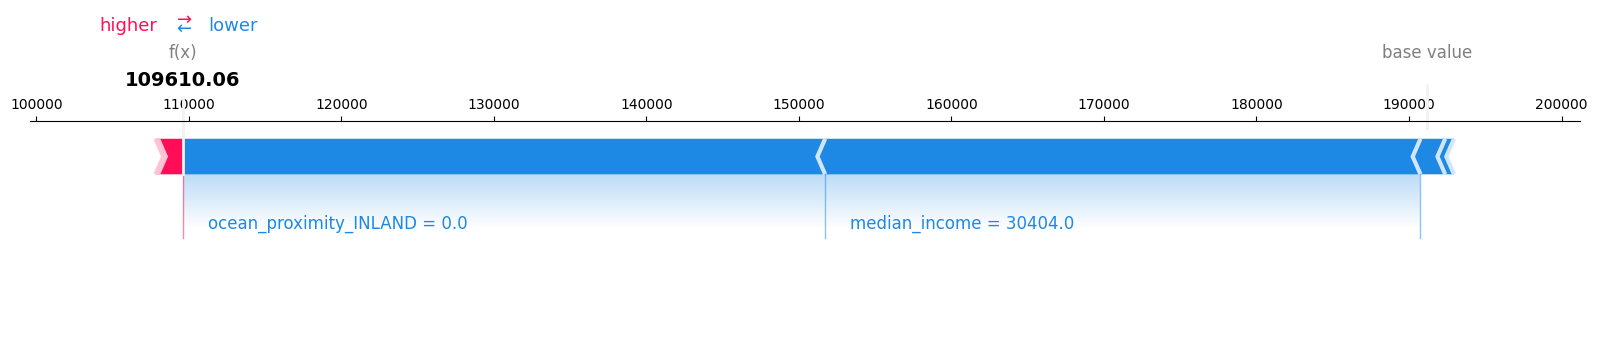

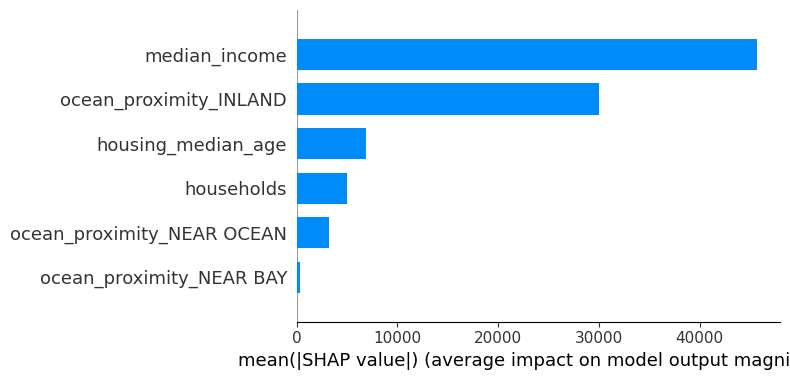

In [20]:
sample_indices = [0, 1, 2]  # Select a few samples for visualization
linear_explainer = shap.Explainer(linear_model, X_train)

linear_shap_values = linear_explainer.shap_values(X_train)

for i, idx in enumerate(sample_indices):
    print("Sample:", idx)
    shap.force_plot(linear_explainer.expected_value, linear_shap_values[idx], features=X_test.iloc[idx], feature_names=X_train.columns,matplotlib=True, show=True)
    plt.show()


# Create a summary plot with bar plot type
shap.summary_plot(linear_shap_values, X_test, plot_type="bar", feature_names=X_train.columns)

# Show the plot
plt.show()

* Using the beeswarm plot explain the model behaviour for the most important variables


In [21]:
import seaborn as sns

# # Assuming you already have coefficients and feature_names
# coefficients = linear_model.coef_
# feature_names = X.columns.to_list()

# # # Calculate absolute coefficients
# absolute_coefficients = [abs(coef) for coef in coefficients]

# # # Sort feature names and absolute coefficients based on absolute coefficient values
# sorted_data = sorted(zip(feature_names, absolute_coefficients), key=lambda x: x[1], reverse=True)
# top_feature_names = [x[0] for x in sorted_data[:2]]  # considering top 5 important variables

# # # Plotting swarm plots for the top 5 important variables
# for feature in top_feature_names:
#     sns.swarmplot(x=feature, y='median_house_value', data=data)  # replace 'target_variable' with your target variable
#     plt.xlabel(feature)
#     plt.ylabel('Target Variable')
#     plt.title(f'Swarm Plot for {feature}')
#     plt.show()


* Use dependance plots in order to understand the behaviour of the most important variables


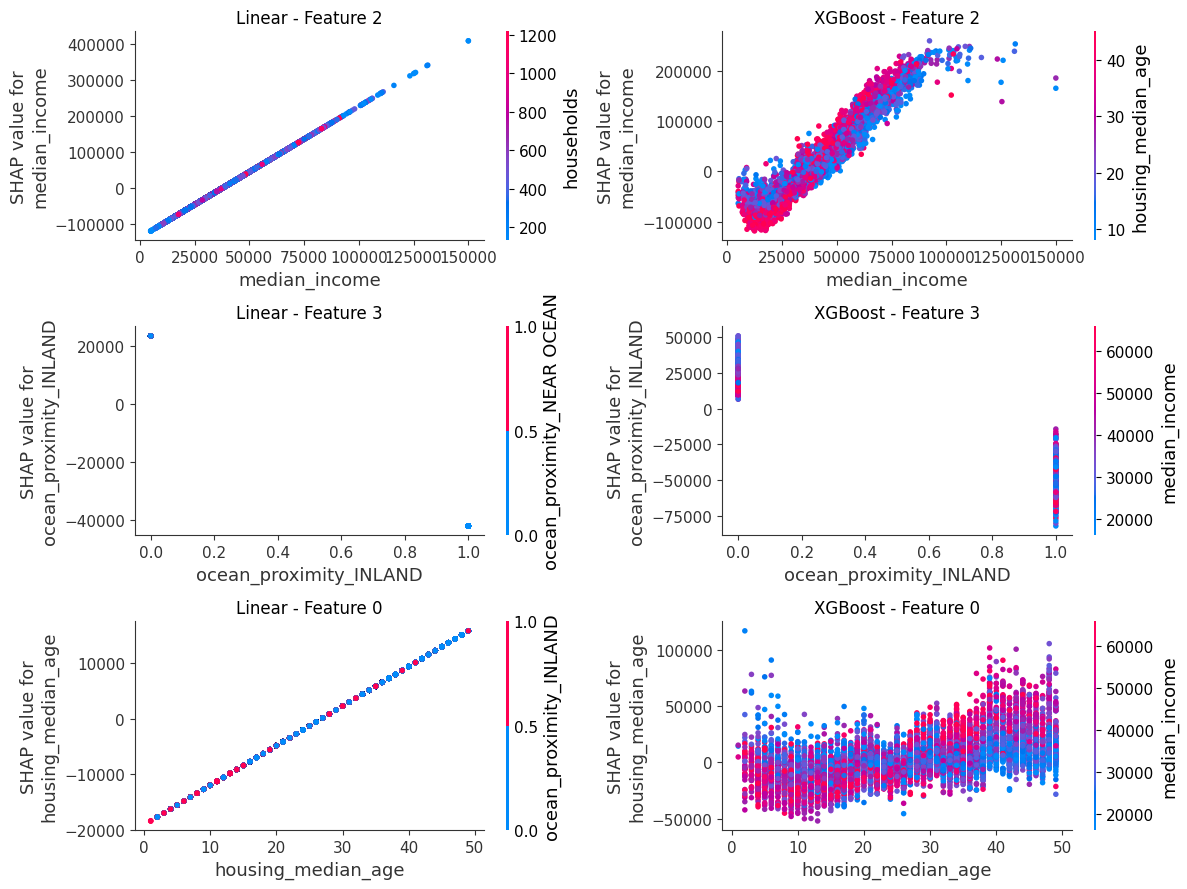

In [22]:
# Get the indices of the most important features based on SHAP values
top_features_indices = np.argsort(np.abs(linear_shap_values).mean(0))[::-1][:3]  # Select top 3 features

# Number of top features to display
num_top_features = len(top_features_indices)

# Create subplots
fig, axs = plt.subplots(num_top_features, 2, figsize=(12, num_top_features * 3))

# Plot dependency plots for the most important features
for i, feature_idx in enumerate(top_features_indices):
    # Plot for Random Forest
    shap.dependence_plot(feature_idx, linear_shap_values, X_train, feature_names=X_train.columns, ax=axs[i, 0], show = False)
    axs[i, 0].set_title(f"Linear - Feature {feature_idx}")

    # Plot for XGBoost
    shap.dependence_plot(feature_idx, xgb_shap_values, X_train, feature_names=X_train.columns, ax=axs[i, 1], show = False)
    axs[i, 1].set_title(f"XGBoost - Feature {feature_idx}")

plt.tight_layout()

Question 7.
We will now do a clusteirng of shapley values.
* Let’s reduce the dimension of our data for visualisation purposes. Do a PCA with the shapley values
and visualise the 2 principal axis.


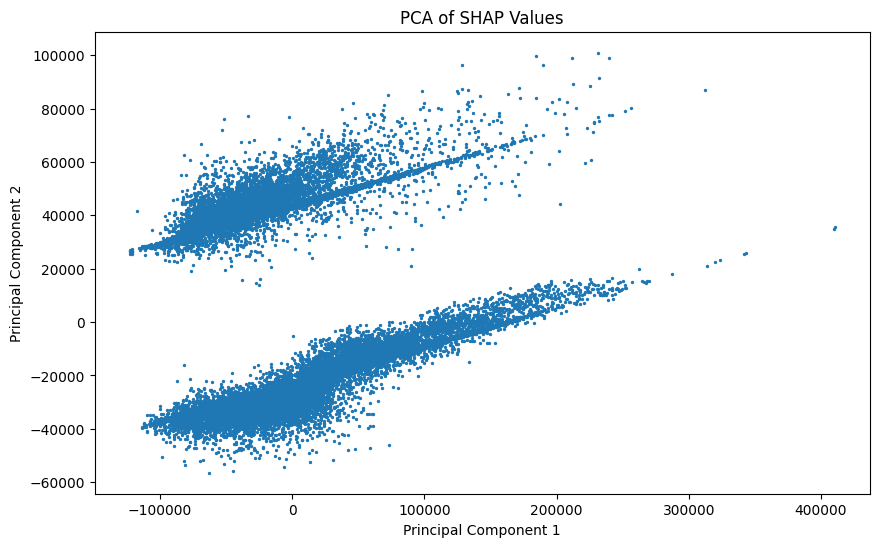

In [23]:
from sklearn.decomposition import PCA

# Concatenate the SHAP values for both models
all_shap_values = np.concatenate([linear_shap_values, xgb_shap_values])

# Compute PCA
pca = PCA(n_components=2)
pca.fit(all_shap_values)

# Transform the SHAP values using PCA
pca_shap_values = pca.transform(all_shap_values)

# Plot the PCA-transformed SHAP values
plt.figure(figsize=(10, 6))
plt.scatter(pca_shap_values[:, 0], pca_shap_values[:, 1],s = 2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of SHAP Values')
plt.show()

* Given the visualisation choose a clustering algorithm (K-Means, DBSCAN, gausian mixture...) and
try to cluster the shapley values of the property.


In [26]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
optimal_n_clusters = 2
gmm = DBSCAN(eps=30000, min_samples=5).fit(all_shap_values)
labels = gmm.labels_
cluster_labels = gmm.fit_predict(all_shap_values)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 26


* Visualise your results


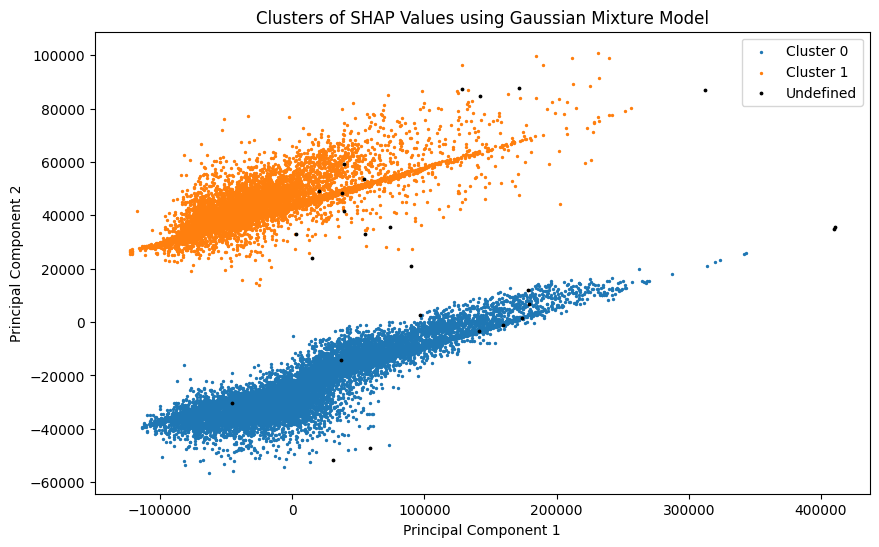

In [27]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters_):
    plt.scatter(pca_shap_values[cluster_labels == cluster_label, 0],
                pca_shap_values[cluster_labels == cluster_label, 1],
                s = 2,
                label=f'Cluster {cluster_label}')
plt.scatter(pca_shap_values[cluster_labels == -1, 0],
                pca_shap_values[cluster_labels == -1, 1],
                s = 3,
                color="black",
                label=f'Undefined')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of SHAP Values using Gaussian Mixture Model')
plt.legend()
plt.show()

* What characteristics can you give to each cluster?


* What conclusion can you reach?